C:\Users\adity\AppData\Local\Temp\ipykernel_27412\1891468736.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\adity\AppData\Local\Temp\ipykernel_27412\1891468736.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

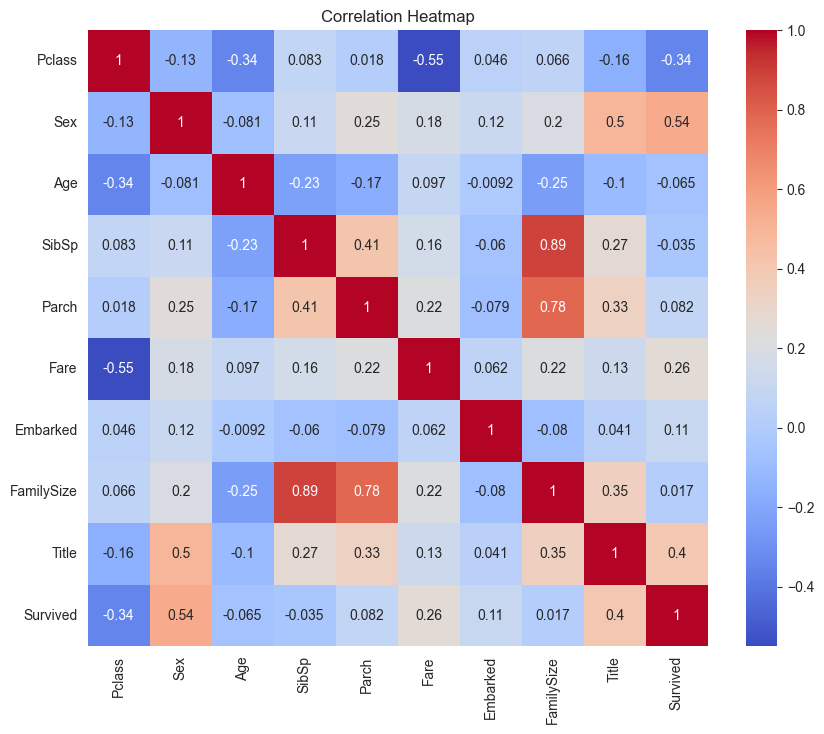


KeyboardInterrupt



In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
url="https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

df = pd.read_csv(url)

# 1. Feature Engineering
# Family Size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Title Extraction
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)', expand=False)

# Optionally, group rare titles
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',
     'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Encode categorical variables for selection
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2})
df['Title'] = df['Title'].map({'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Rare':4})

# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(0, inplace=True)

# Select features for analysis
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'Title']
X = df[features]
y = df['Survived']

# 2. Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[features + ['Survived']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 3. SelectKBest
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)
scores = selector.scores_

# Show feature scores
feature_scores = pd.DataFrame({'Feature': features, 'Score': scores})
print(feature_scores.sort_values(by='Score', ascending=False))